In [ ]:
#Sign Language Recognition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls

drive  main.py	sample_data


In [ ]:
!unzip /content/drive/MyDrive/SLR/archive.zip

In [ ]:
!ls

drive  sample_data  test_set  training_set


In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
# Importing the Keras libraries and packages

from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten ,Dropout
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

train_dir = "/content/training_set"
eval_dir = "/content/test_set"

In [ ]:
#Helper function to load images from given directories
def load_images(directory):
    images_test = [] #testing data
    labels = []   # initialize two empty lists to store images and labels. /training data
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file #building the path for file
            image = cv2.resize(cv2.imread(filepath), (64, 64)) #reads the image using opencv and resizes it to 64x64 pixels.
            images_test.append(image)
            labels.append(idx)
    images_test = np.array(images_test)   #convert the lists to NumPy arrays.
    labels = np.array(labels)
    return(images_test, labels)    #returns the NumPy arrays containing images and labels.

In [ ]:
import keras

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)

if uniq_labels == sorted(os.listdir(eval_dir)):
    X_eval, y_eval = load_images(directory = eval_dir)
    #This line reads the list of unique labels (directories) from (train_dir) and sorts them alphabetically.
 #checks wheather the training data is same as evaluation data.
 #if the condition is true, loads evluation data.

**Note:** In the train-test split I have used the stratify argument on the labels. This argument ensures that the data is split evenly along all labels

In [ ]:
#Training and Testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of signs ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

Total number of signs  36
Number of training images:  43387
Number of testing images:  10847
Number of evaluation images:  7200


In [ ]:
uniq_labels

['1',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [ ]:
len(uniq_labels)

36

In [ ]:
#one hot encoding in 2D array
y_train = keras.utils.to_categorical(y_train) #it converts the class vector to binary matrix.
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [ ]:
#checking if the data is converted into array.
print('array:',y_train[0])
print(len(y_train[0]))

array: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
36


In [ ]:
#Preprocessing data. #scaling the data for the convergence of neural network training.
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

In [ ]:
#inirialising the VGG19 model from ImageNet
classifier_vgg19= VGG19(input_shape= (64,64,3),include_top=False,weights='imagenet')

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
#Initialising RESnet50
classifier_resnet = ResNet50(input_shape= (64,64,3),include_top=False,weights='imagenet')

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in classifier_vgg19.layers:
  layer.trainable= False

In [ ]:
#don't train existing weights for resnet50
for layer in classifier_resnet.layers:
    layer.trainable = False

In [ ]:
#VGG19
classifier= classifier_vgg19.output
classifier = Flatten()(classifier)#elongating the pooling map
classifier= Dropout (0.6)(classifier)
classifier= Dense (256, activation="relu")(classifier)
classifier = Dense(units=36, activation='softmax')(classifier)
model= Model(inputs= classifier_vgg19.input, outputs= classifier)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#ResNet50
classifier2 = classifier_resnet.output#head mode
classifier2 = Flatten()(classifier2)#elongating the pooling map
classifier2 = Dropout(0.4)(classifier2) #drops the training nodes for avoiding overfitting
classifier2 = Dense(units=36, activation='softmax')(classifier2) #dense where every input is connected to its output layer by weights.
#softmax: to predict the class of an input image.
model2 = Model(inputs = classifier_resnet.input , outputs = classifier2)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#!pip install keras
#from keras.utils.vis_utils import plot_model
#from tensorflow.keras.utils import plot_model #gets model arch.
model.summary() #VGG19

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
model2.summary() #model summary
#plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#RESET50

In [ ]:
#VGG19
#train fit the model
history1 = model.fit(X_train, y_train, epochs =4, batch_size = 64,validation_data=(X_test,y_test))

Epoch 1/4
678/678 [==============================] - 3299s 5s/step - loss: 0.1996 - accuracy: 0.9529 - val_loss: 0.0024 - val_accuracy: 0.9999
Epoch 2/4
551/678 [=======================>......] - ETA: 8:03 - loss: 0.0175 - accuracy: 0.9954

In [ ]:
#train fit the model
history2 = model2.fit(X_train, y_train, epochs =5, batch_size = 64,validation_data=(X_test,y_test))

In [ ]:
# Saving the model of resnet
#resnet50
model.save('model_vgg19.h5')
#model2.save('model_resnet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#VGG19
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')
score = model.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

Accuracy for test images: 99.991 %
Accuracy for evaluation images: 100.0 %


In [ ]:
#resnet50
score = model2.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')
score = model2.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

Accuracy for test images: 100.0 %
Accuracy for evaluation images: 100.0 %


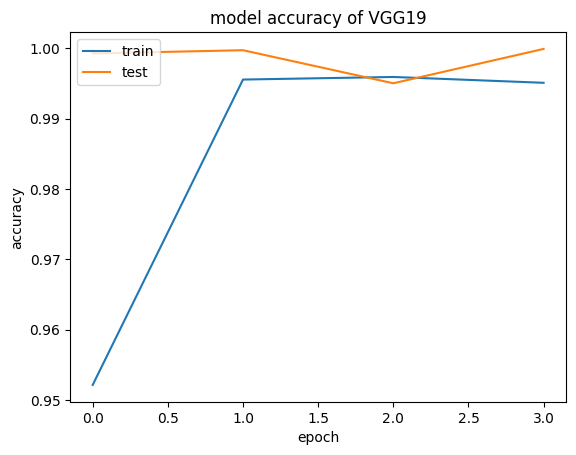

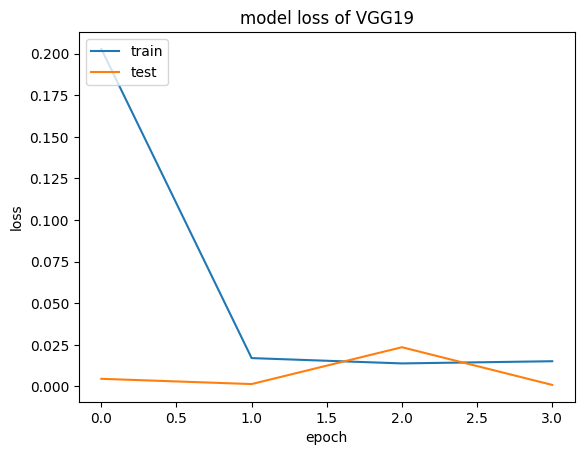

In [ ]:
#vgg19/vgg16
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy of VGG19')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss of VGG19')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

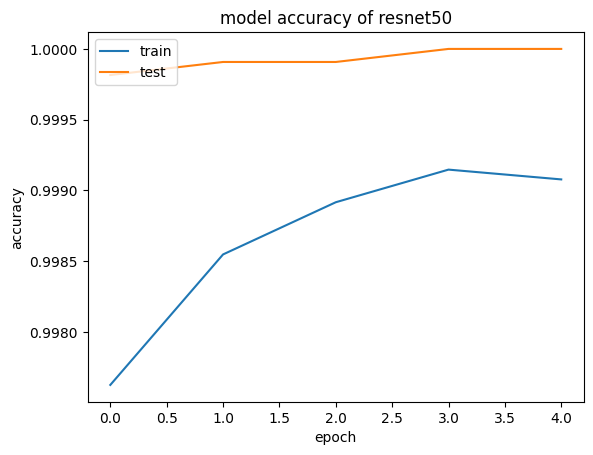

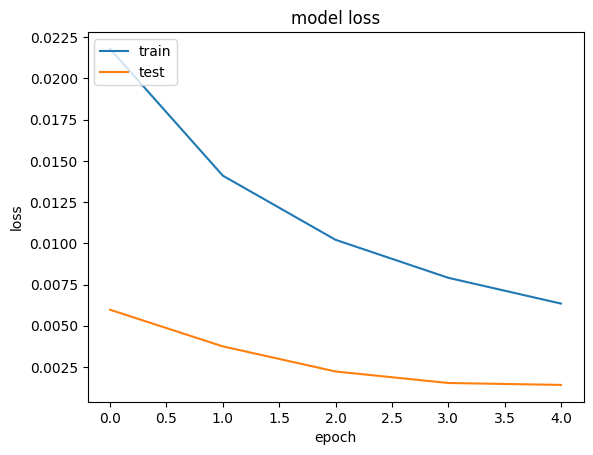

In [ ]:
#ResNet50
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy of ResNet50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss of ResNet50')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

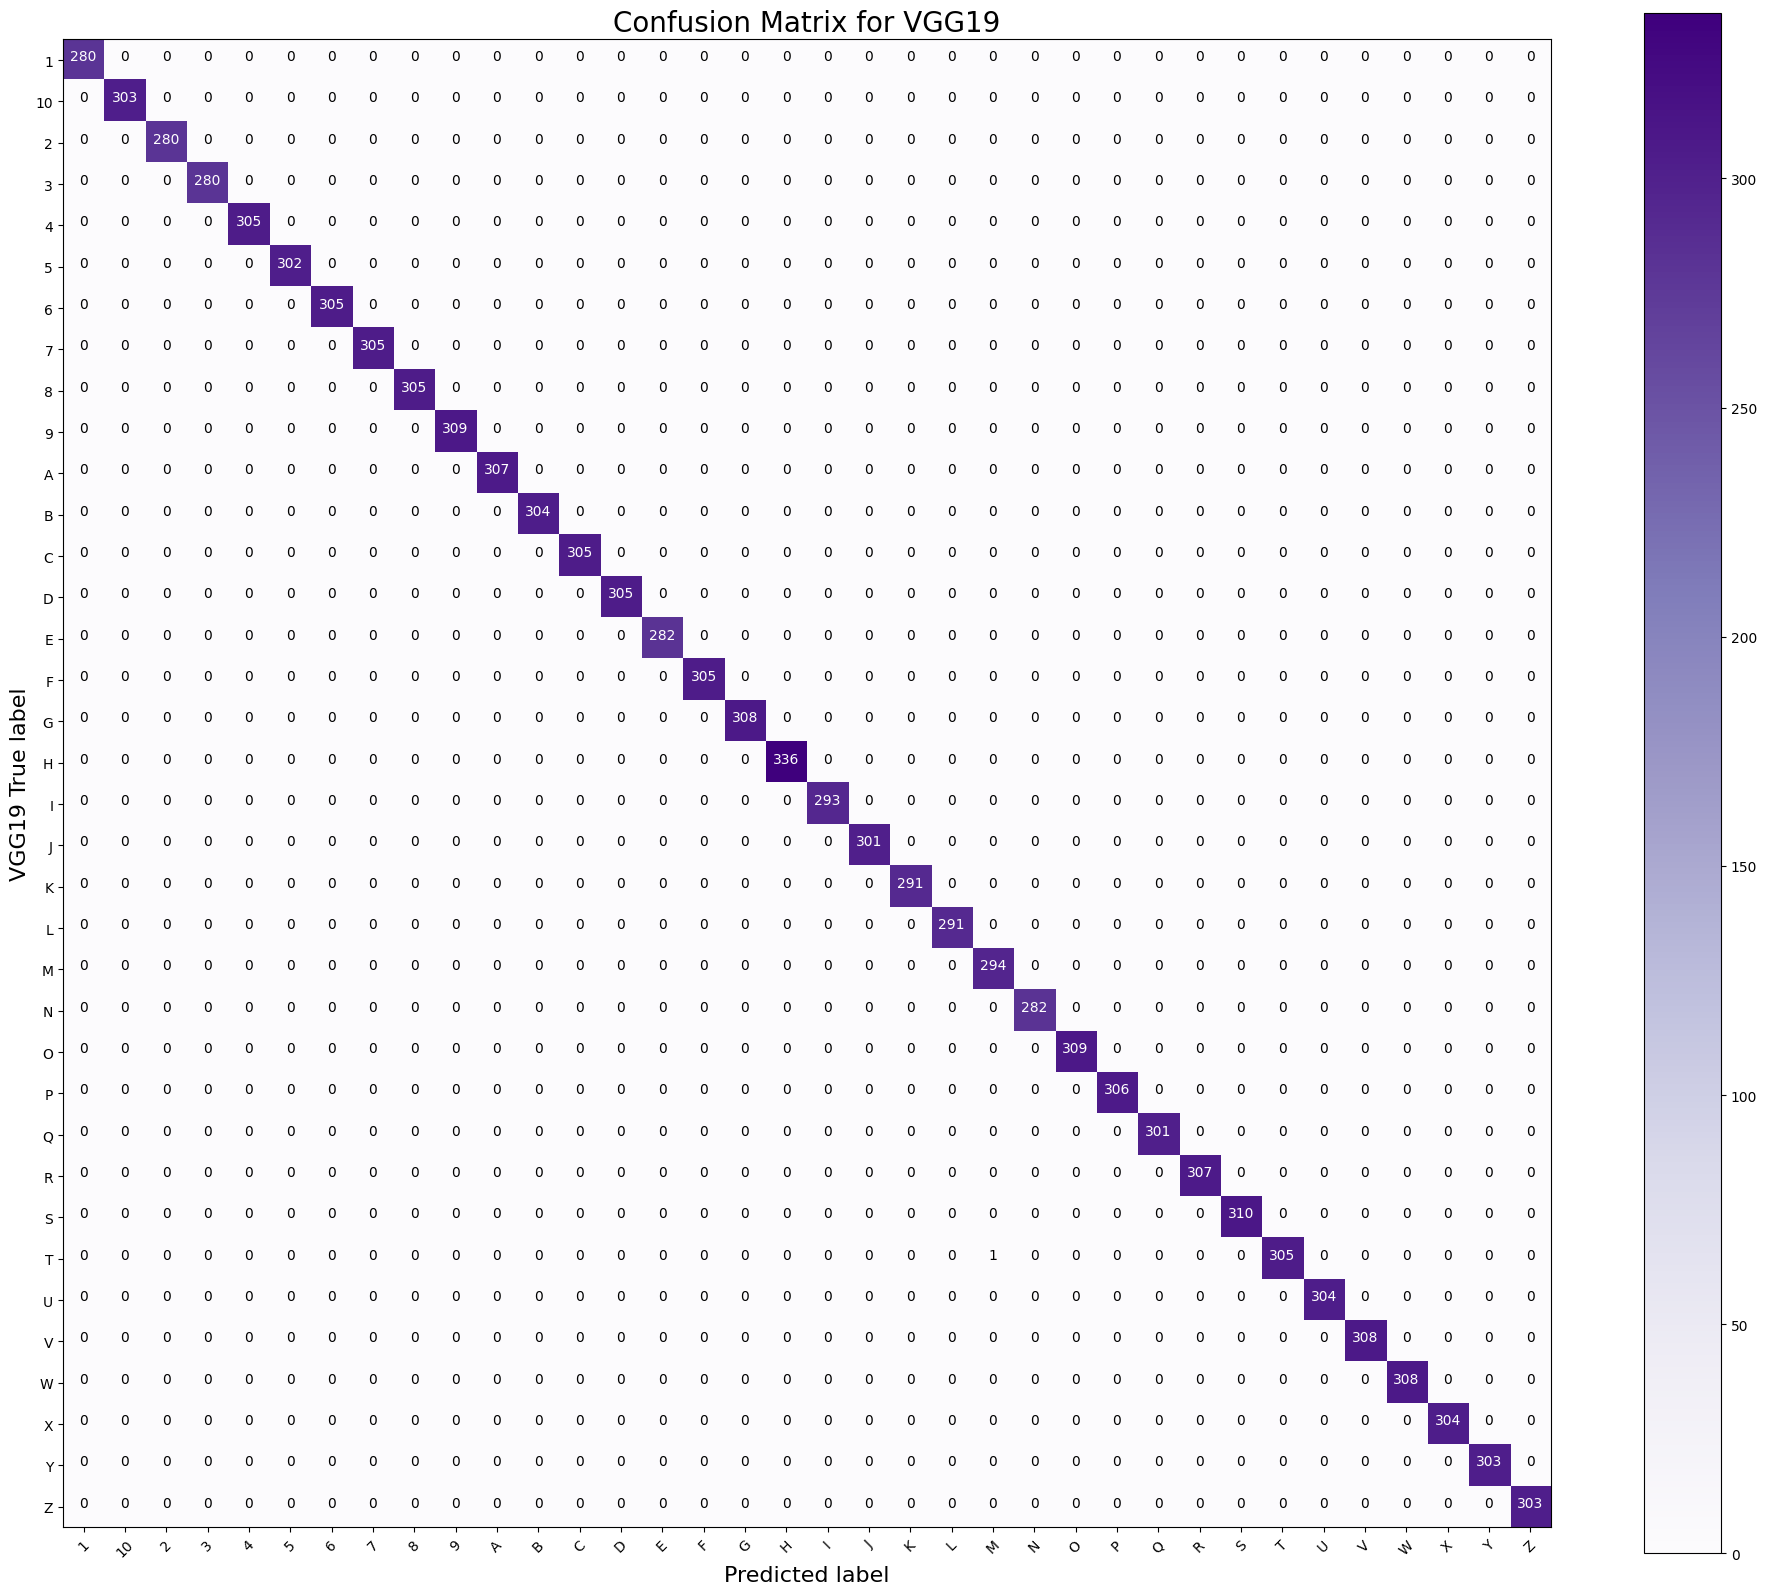

In [ ]:
#vgg19/vgg16
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix for VGG19")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('VGG19 True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()
from sklearn.metrics import confusion_matrix
import itertools
y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

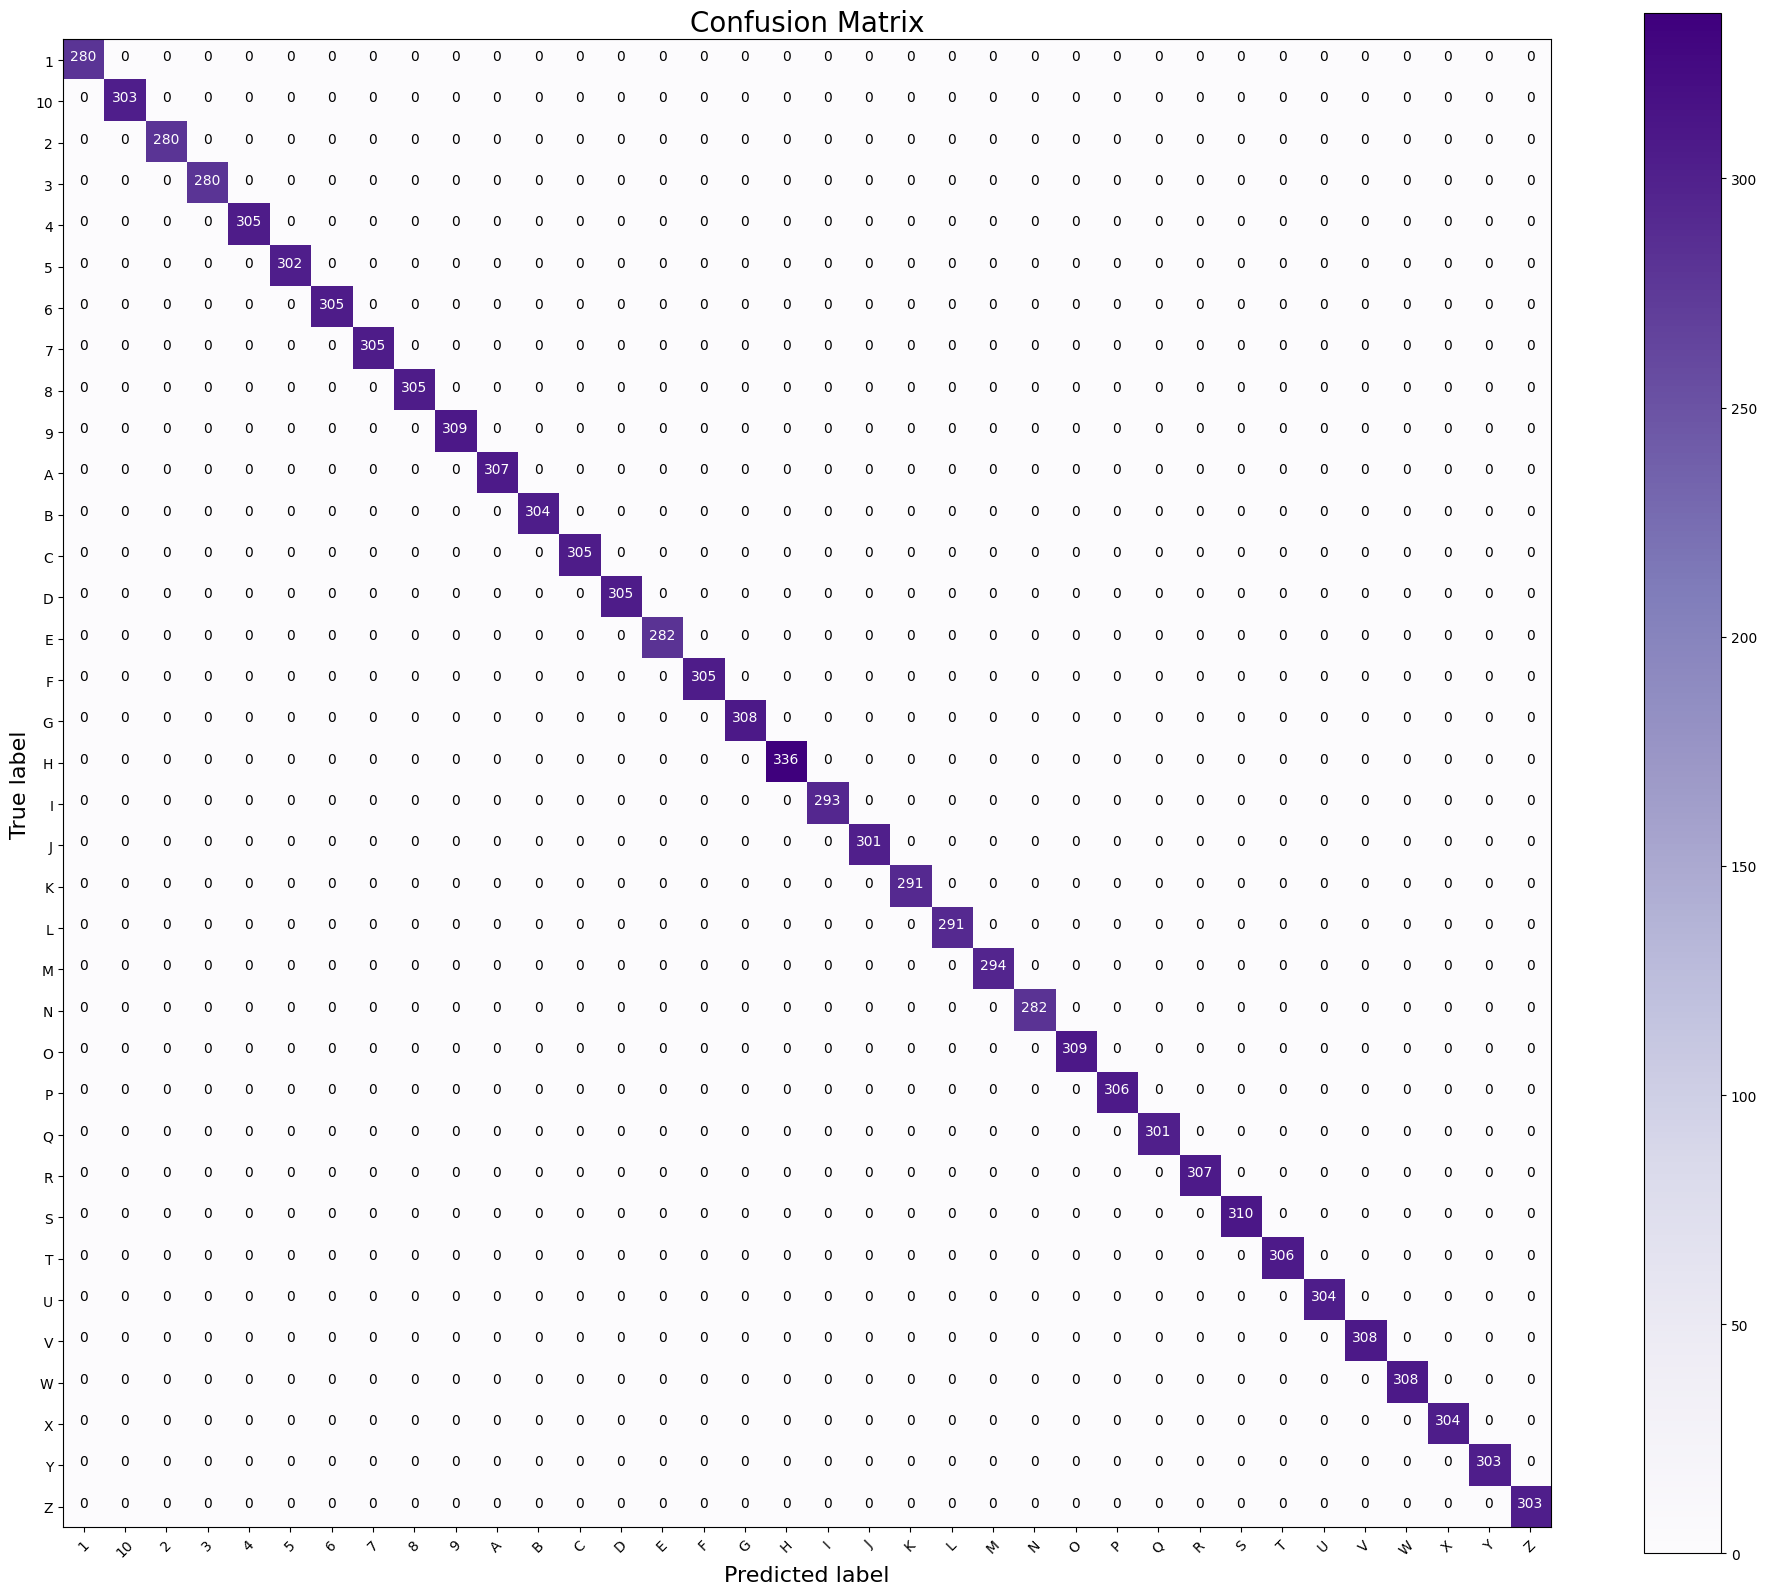

In [ ]:
#resnet50
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix of ResNet50")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('ResNet50 True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model2.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

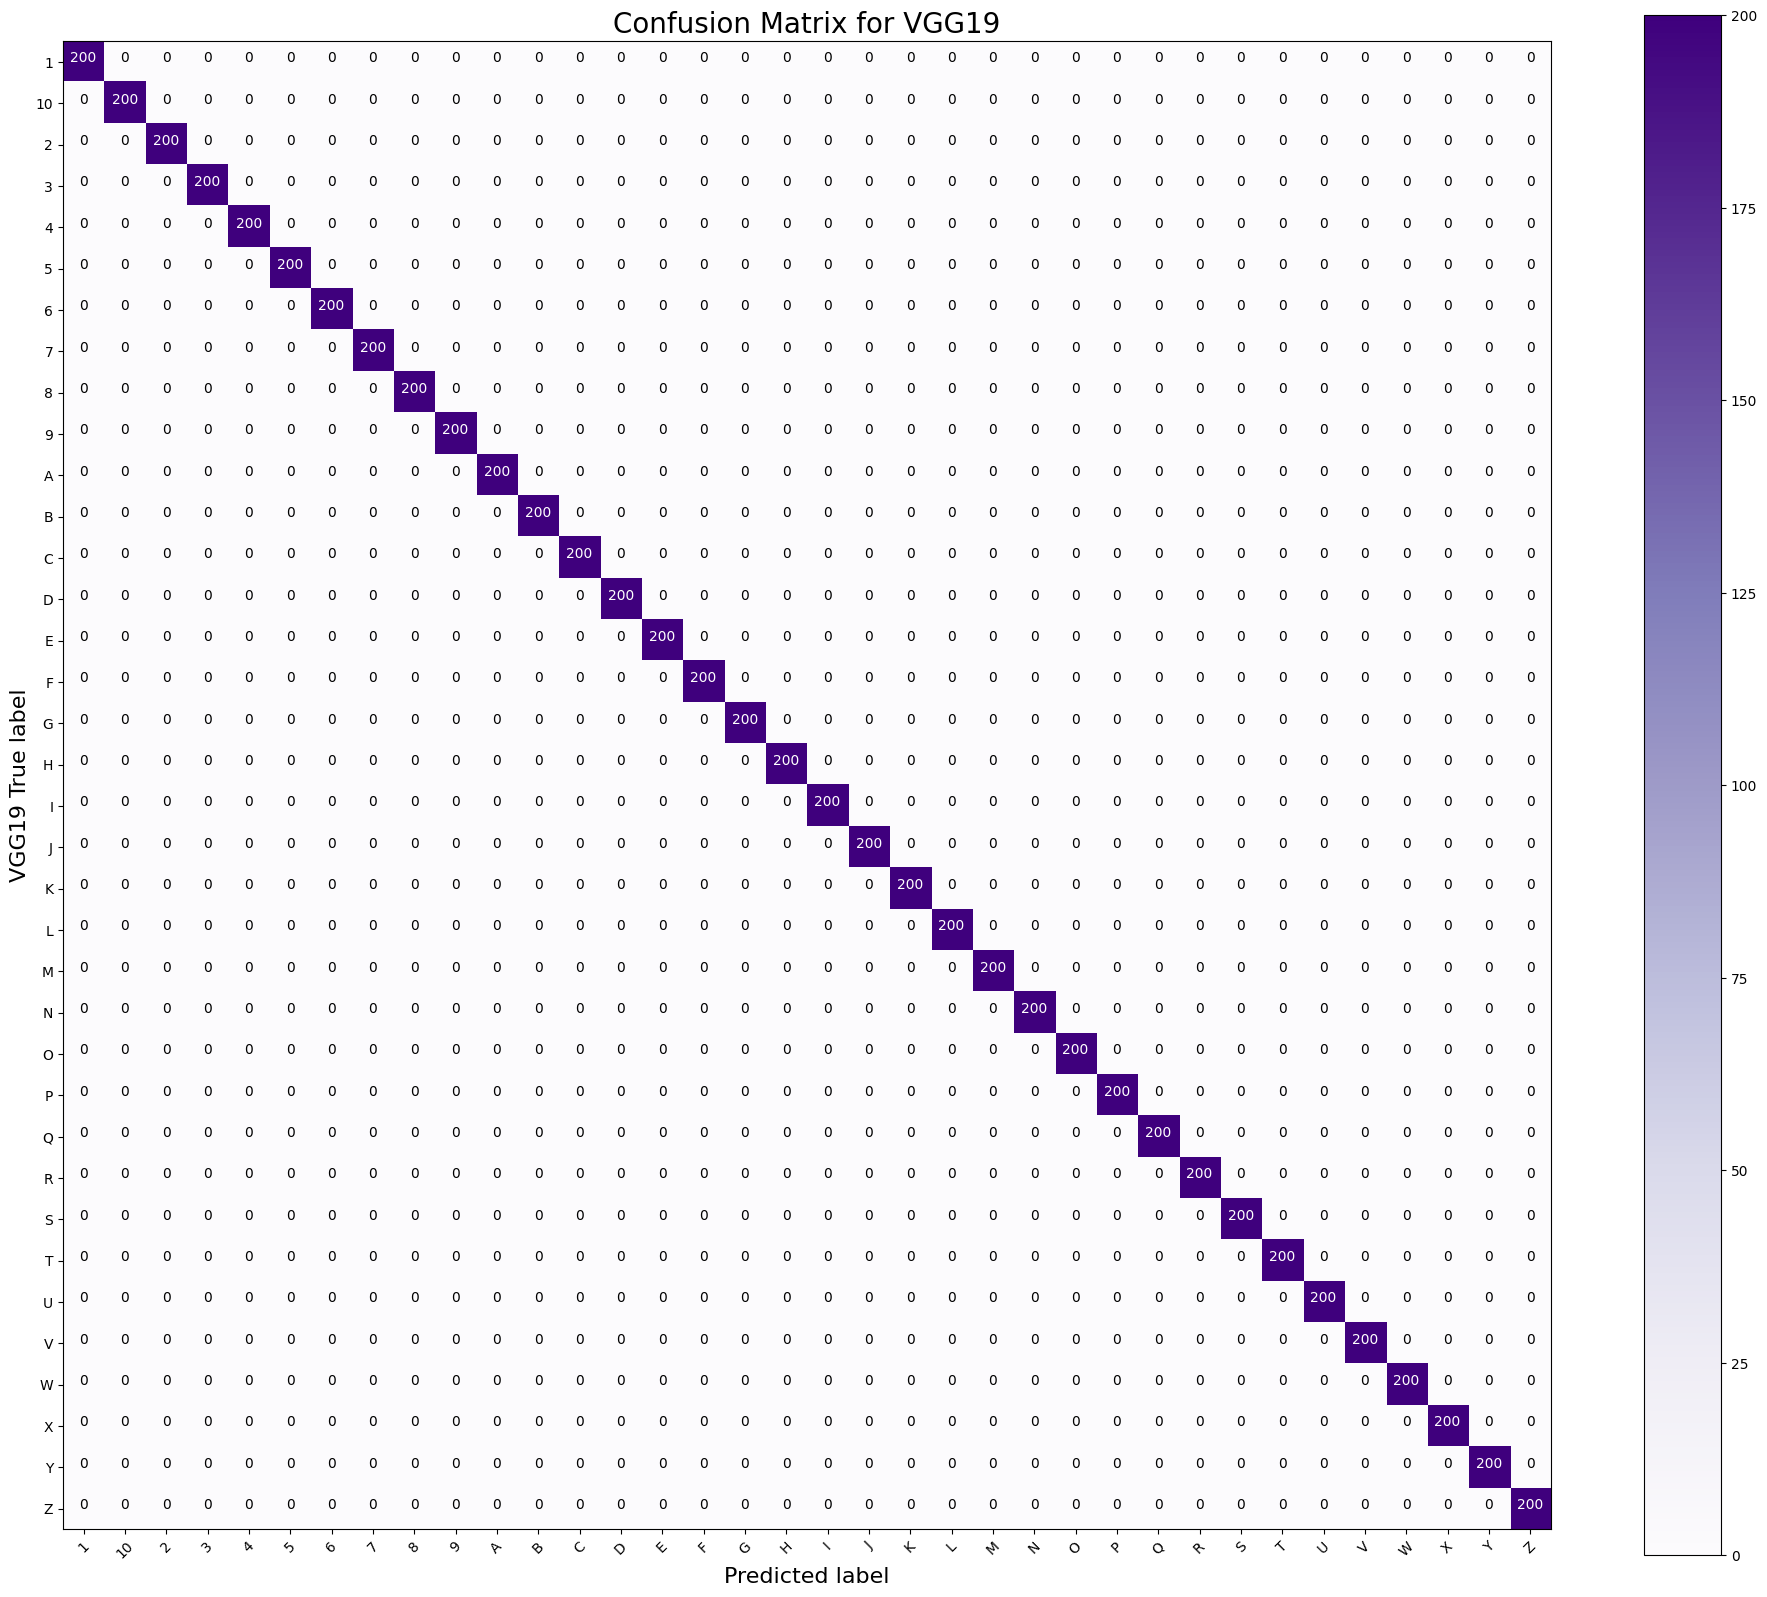

In [ ]:
#vgg19/vgg16
y_eval_pred = model.predict(X_eval, batch_size = 512,verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)

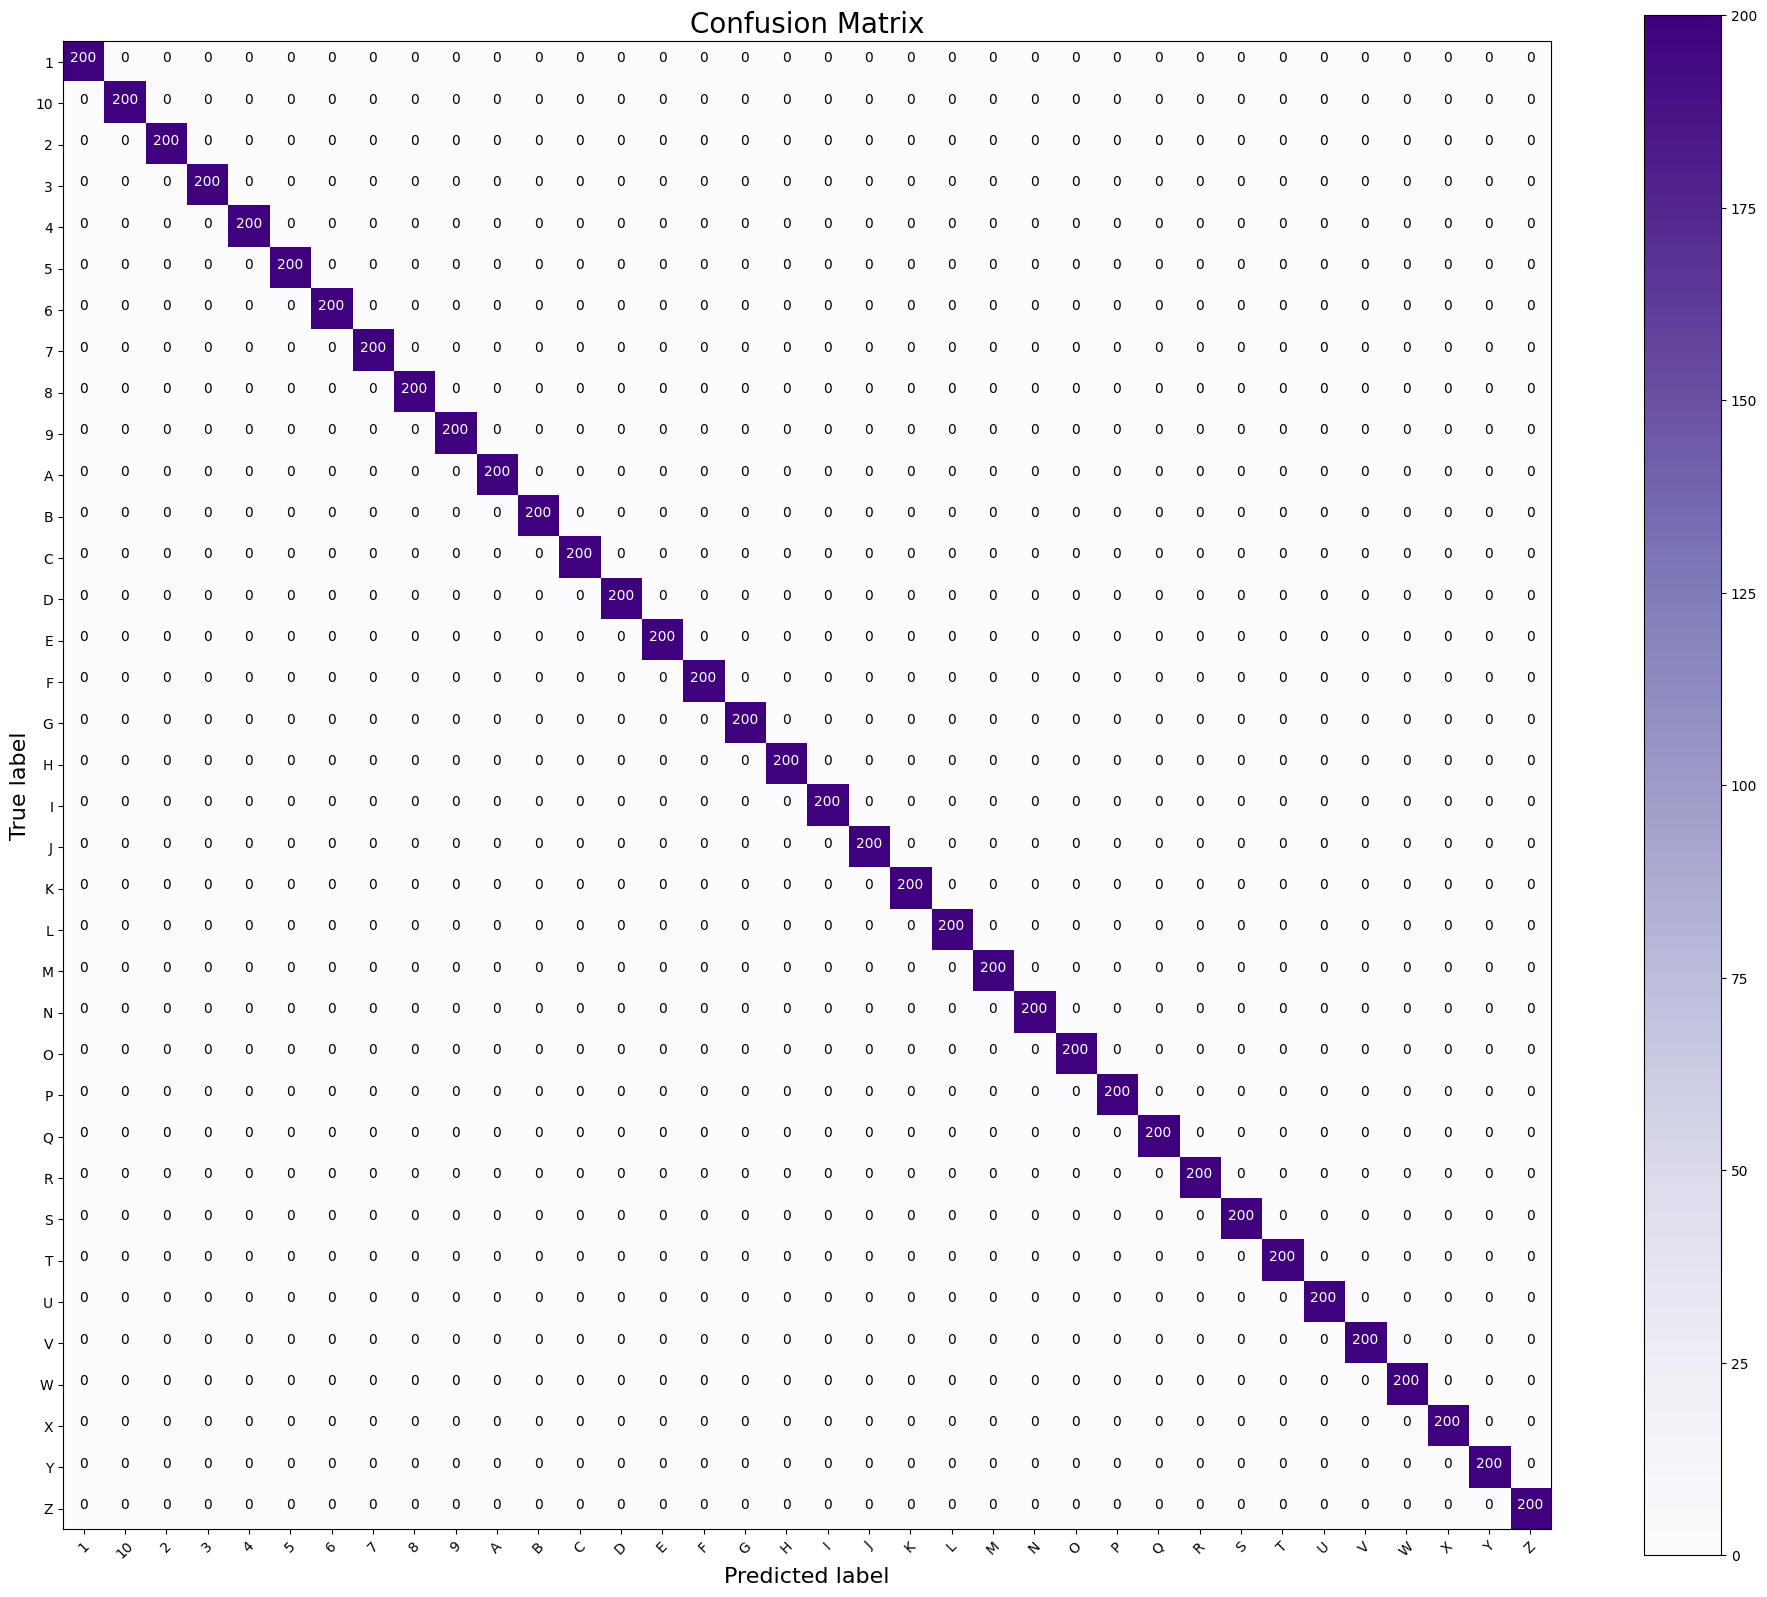

In [ ]:
#resnet50
y_eval_pred = model2.predict(X_eval, batch_size = 512,verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)

1/1 [==============================] - 1s 560ms/step


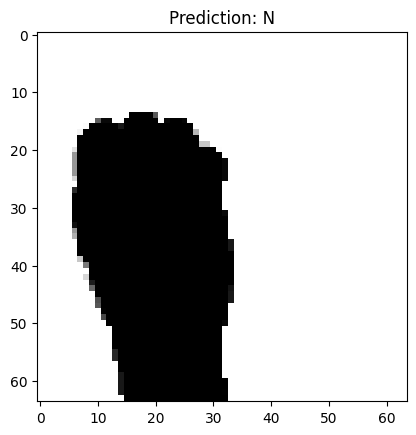

Image: 48.png, Prediction: N
1/1 [==============================] - 0s 19ms/step


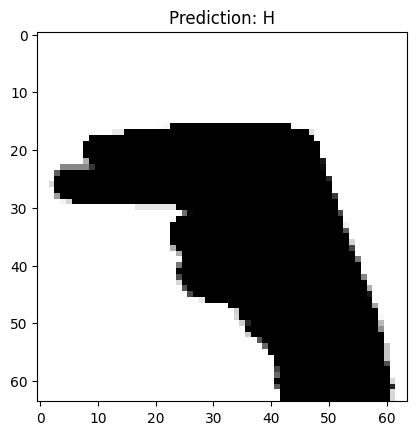

Image: 2.png, Prediction: H
1/1 [==============================] - 0s 18ms/step


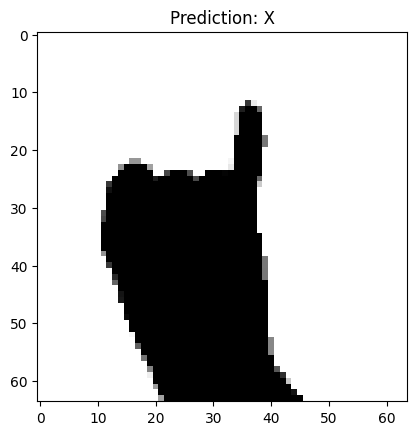

Image: 993.png, Prediction: X
1/1 [==============================] - 0s 18ms/step


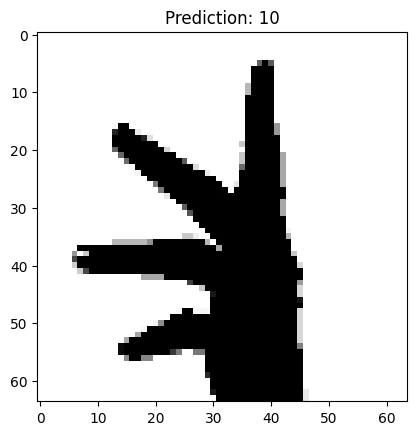

Image: 10.png, Prediction: 10


In [ ]:
from keras.preprocessing import image
import os
import numpy as np
# Path to the folder containing images
folder_path = '/content/images'  # Replace 'image_folder' with the path to your image folder

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(('.png')):  # Check if the file is an image file
        file_path = os.path.join(folder_path, filename)  # Construct the full file path

        # Load the image
        test_image = image.load_img(file_path, target_size=(64, 64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)

        # Perform prediction using the model
        result = model.predict(test_image)

        # Map the output probabilities to their corresponding classes
        classes = {
            0: '1', 1: '10', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
            10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
            20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
            30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'
        }

        # Get the predicted class
        predicted_class = classes[np.argmax(result)]
        plt.imshow(test_image[0].astype(np.uint8))
        plt.title(f"Prediction: {predicted_class}")
        plt.axis('on')
        plt.show()

        # Print the predicted class
        print(f"Image: {filename}, Prediction: {predicted_class}")


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
!wget -q -O - ipv4.icanhazip.com
! streamlit run main.py & npx localtunnel --port 8501

34.83.231.135



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.83.231.135:8501

npx: installed 22 in 4.324s
your url is: https://floppy-bats-poke.loca.lt
2024-03-19 20:13:55.952399: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 20:13:55.952452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 20:13:55.953949: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 20:13:57.109201: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-19 2